1.Import libraries

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

Step2 = Create the Dataset

In [8]:
# set the random seed for reproducibility
np.random.seed(42)
# create a synthetic dataset
data = {
    'product_id': range(1,21),
    'product_name': [f'product {i}' for i in range(1,21)],
    'category': np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold': np.random.poisson(lam=20,size=20),# position distribution for sales
    'sale_date': pd.date_range(start = '2023-01-01',periods=20,freq='D')
}
sales_data = pd.DataFrame(data)
# Display the first row of the dataset
print('Sales Data:')
print(sales_data)

Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1    product 1         Home          25 2023-01-01
1            2    product 2       Sports          15 2023-01-02
2            3    product 3  Electronics          17 2023-01-03
3            4    product 4         Home          19 2023-01-04
4            5    product 5         Home          21 2023-01-05
5            6    product 6       Sports          17 2023-01-06
6            7    product 7  Electronics          19 2023-01-07
7            8    product 8  Electronics          16 2023-01-08
8            9    product 9         Home          21 2023-01-09
9           10   product 10     Clothing          21 2023-01-10
10          11   product 11         Home          17 2023-01-11
11          12   product 12         Home          22 2023-01-12
12          13   product 13         Home          14 2023-01-13
13          14   product 14         Home          17 2023-01-14
14          15   product 15 

In [9]:
#save the dataframe as csv file 
sales_data.to_csv('sales_data.csv',index=False)

In [10]:
# path location
import os
os.getcwd()

'c:\\Users\\HP\\OneDrive\\Documents\\data science\\Advance_ stat'

step 3: Descriptive Statistics

In [16]:
# Descriptiv statistics
descriptive_stats = sales_data['units_sold'].describe()
# Display the descriptive statistics
print("\nDcscriptive Statistics for Unites sold:")
print(descriptive_stats)
#Additional statistics
mean_sales = sales_data['units_sold'].mean()
median_sales = sales_data['units_sold'].median()
mode_sales = sales_data['units_sold'].mode()[0]
std_deviation_sales = sales_data['units_sold'].std()
variance_sales = sales_data['units_sold'].var()
# Group by catagory and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum','mean','std']).reset_index()
category_stats.columns = ['Category','Total Units Sold','Average Units Sold','Std Dev of Units Sold']

# Display the result
print("\nStatistical Analysis: ")
print(f'Mean Units Sold: {mean_sales}')
print(f'Median Units Sold : {median_sales}')
print(f'Mode Units Sold:{mode_sales}')
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)




Dcscriptive Statistics for Unites sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis: 
Mean Units Sold: 18.8
Median Units Sold : 18.5
Mode Units Sold:17
Variance of Units Sold: 10.90526315789474
Standard Deviation of Units Sold: 3.3023117899275864

Category Statistics:
      Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0     Clothing                21           21.000000                    NaN
1  Electronics                73           18.250000               2.217356
2         Home               181           20.111111               3.723051
3       Sports               101           16.833333               2.714160


Step 4 : Inferential Statistics

In [17]:
# confidence Interval for the mean of units sold
confidence_level = 0.95
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1+confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\n Confidence Interval for the Mean of Units Sold:")
print(confidence_interval)


 Confidence Interval for the Mean of Units Sold:
(np.float64(17.254470507823573), np.float64(20.34552949217643))


In [18]:
# confidence Interval for the mean of units sold
confidence_level = 0.99
degrees_freedom = len(sales_data['units_sold'])-1
sample_mean = mean_sales
sample_standard_error = std_deviation_sales / np.sqrt(len(sales_data['units_sold']))

#t-score for the confidence level
t_score = stats.t.ppf((1+confidence_level) / 2, degrees_freedom)
margin_of_error = t_score * sample_standard_error

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("\n Confidence Interval for the Mean of Units Sold:")
print(confidence_interval)


 Confidence Interval for the Mean of Units Sold:
(np.float64(16.687430485978535), np.float64(20.912569514021467))


Hypothesis Testing


In [19]:
# Hypothesis Testing (t_test)
# Null Hypothesis : Mean units sold is equals to 20
# Alternative Hypothesis : Mean unit sold is not equals to 20
t_statistic,p_value = stats.ttest_1samp(sales_data['units_sold'],20)
print("\nHypothesis Testing (t_test):")
print(f'T-statistic: {t_statistic}, p_value:{p_value}')
if p_value < 0.05:
    print('Reject the null hypothesis :The mean units sold is significantly fifferent from 20.')
else:
    print('Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.')
    


Hypothesis Testing (t_test):
T-statistic: -1.6250928099424466, p_value:0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


Step 5 : Visualizations

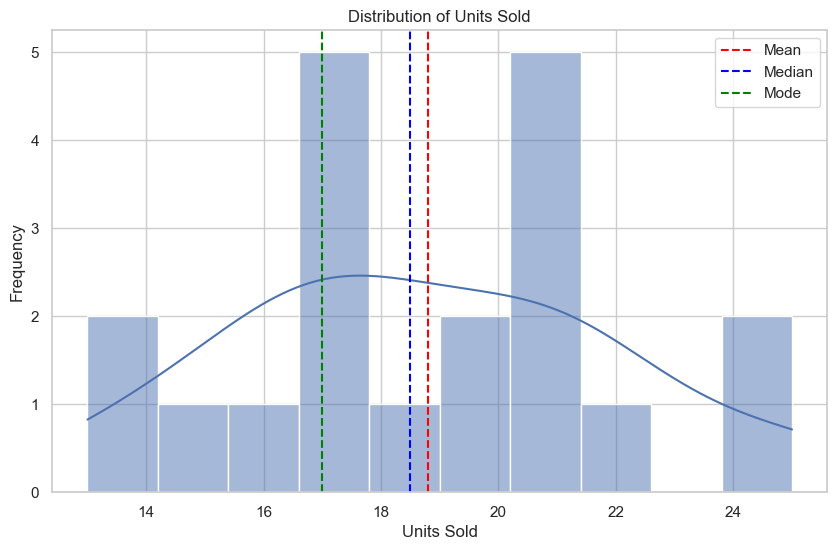

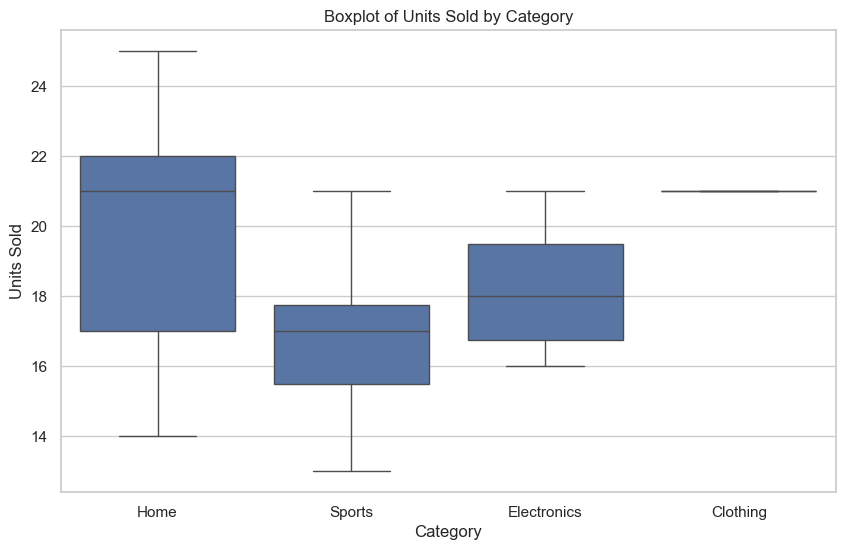

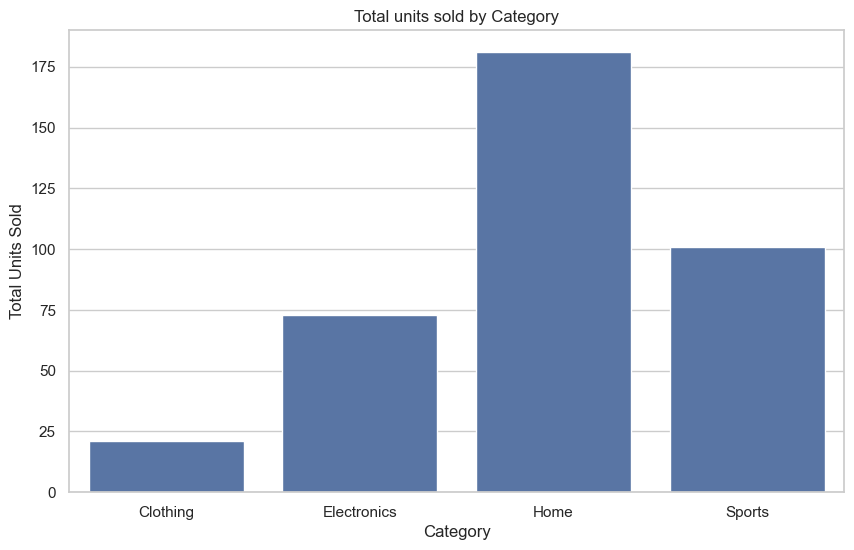

In [22]:
#Visualization
sns.set(style='whitegrid')

# Plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10,kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(median_sales, color = 'blue', linestyle = '--', label = 'Median')
plt.axvline(mode_sales, color = 'green', linestyle = '--', label = 'Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x = 'category', y = 'units_sold', data = sales_data)
plt.title('Boxplot of Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

# Barplot for total units sold by category
plt.figure(figsize=(10,6))
sns.barplot(x = 'Category', y = 'Total Units Sold', data = category_stats)
plt.title('Total units sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()
